# Import Libraries

In [2]:
import psycopg2
import pickle
from faker import Faker
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import csv
import pandas as pd
from scipy.stats import kendalltau
import warnings
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Creata Dummy Data

In [66]:
# CREATE TABLE nama_tabel (
#     ACCOUNT_NUMBER VARCHAR(255),
#     TRX_TYPE VARCHAR(255),
#     AMOUNT INTEGER,
#     FLAG_DB_CR VARCHAR(1),
#     INFORMATION VARCHAR(255),
#     TRX_DATE BIGINT,
#     REFERENCE_NUMBER VARCHAR(255),
#     CURRENCY VARCHAR(3),
#     TRX_TIME VARCHAR(10),
#     CIF VARCHAR(10),
#     FITUR VARCHAR(255)
# );


In [67]:
# def create_dummy_data(num_rows):
#     fake = Faker()
#     conn = psycopg2.connect(
#         dbname='data_dumy',
#         user='postgres',
#         password='postgres',
#         host='localhost',
#         port='5432'
#     )
#     cursor = conn.cursor()

#     for _ in range(num_rows):
#         account_number = fake.random_number(digits=6)
#         trx_type = fake.random_element(elements=('Ewallet', 'Transfer', 'Payment'))
#         amount = random.randint(-100000, 100000)
#         flag_db_cr = fake.random_element(elements=('D', 'C'))
        
#         # Informasi transaksi yang diminta
#         information = fake.random_element(elements=(
#             "WITHDRAWAL TRANSFER (ATM)", "GOPAY", "DEPOSIT TRANSFER (ATM)",
#             "DEPOSIT CROSS BORDER", "WITHDRAWAL TRANSFER", "REVERSAL",
#             "BIAYA ADMIN", "PAYMENT CC", "PAYMENT TELCO PASCABAYAR"
#         ))
        
#         trx_date = int(time.time())
#         reference_number = fake.random_number(digits=6)
#         currency = fake.random_element(elements=('IDR', 'USD', 'EUR'))
#         trx_time = fake.time(pattern='%H:%M:%S')
#         cif = fake.random_number(digits=10)
#         fitur = fake.random_element(elements=('Gopay', 'OVO', 'Dana'))

#         # Query untuk memasukkan data ke dalam tabel di PostgreSQL
#         query = """
#         INSERT INTO dummy(
#             ACCOUNT_NUMBER, TRX_TYPE, AMOUNT, FLAG_DB_CR,
#             INFORMATION, TRX_DATE, REFERENCE_NUMBER,
#             CURRENCY, TRX_TIME, CIF, FITUR
#         ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
#         """
#         data = (
#             account_number, trx_type, amount, flag_db_cr,
#             information, trx_date, reference_number,
#             currency, trx_time, cif, fitur
#         )
#         cursor.execute(query, data)

#     conn.commit()
#     cursor.close()
#     conn.close()

# # Memanggil fungsi untuk membuat 1 juta data dummy
# create_dummy_data(1000000)


# Data Loading

In [68]:
# # Koneksi ke database
# conn = psycopg2.connect(
#     dbname='data_dumy',
#     user='postgres',
#     password='postgres',
#     host='localhost',
#     port='5432'
# )

# # Buat objek cursor
# cur = conn.cursor()

# # Lakukan query untuk mengambil semua data dari tabel
# cur.execute("SELECT * FROM dummy")

# # Ambil semua hasil query
# data = cur.fetchall()

# # Simpan hasil query ke dalam file CSV
# nama_file_csv = 'hasil_query.csv'

# with open(nama_file_csv, 'w', newline='') as file_csv:
#     writer = csv.writer(file_csv)
    
#     # Tulis header (nama kolom)
#     writer.writerow([desc[0] for desc in cur.description])
    
#     # Tulis data
#     for row in data:
#         writer.writerow(row)

# # Tutup kursor dan koneksi
# cur.close()
# conn.close()

# print(f"Data berhasil disimpan ke dalam file CSV dengan nama: {nama_file_csv}")


In [12]:
data = pd.read_csv("hasil_query.csv")
data

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,55446,Payment,97312,C,WITHDRAWAL TRANSFER (ATM),1702974481,482252,EUR,05:49:53,8039417467,Dana
1,600387,Ewallet,-81175,D,BIAYA ADMIN,1702974481,752022,USD,14:12:15,1504409771,OVO
2,115823,Payment,33686,D,GOPAY,1702974481,43417,EUR,01:02:54,9678566510,Gopay
3,411840,Payment,13414,C,DEPOSIT TRANSFER (ATM),1702974481,574789,USD,05:12:53,7709561344,OVO
4,85697,Ewallet,48665,D,WITHDRAWAL TRANSFER (ATM),1702974481,987493,IDR,18:12:22,550868176,Gopay
...,...,...,...,...,...,...,...,...,...,...,...
999995,118085,Transfer,-32117,C,DEPOSIT CROSS BORDER,1702974698,356025,USD,22:32:43,2152574033,Dana
999996,188351,Transfer,79214,C,PAYMENT TELCO PASCABAYAR,1702974698,487155,IDR,05:43:10,5482232444,OVO
999997,676071,Ewallet,-97273,C,BIAYA ADMIN,1702974698,49524,USD,05:13:39,2387453059,Gopay
999998,864344,Transfer,98985,D,DEPOSIT CROSS BORDER,1702974698,56703,IDR,22:55:59,8320169730,Gopay


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   account_number    1000000 non-null  int64 
 1   trx_type          1000000 non-null  object
 2   amount            1000000 non-null  int64 
 3   flag_db_cr        1000000 non-null  object
 4   information       1000000 non-null  object
 5   trx_date          1000000 non-null  int64 
 6   reference_number  1000000 non-null  int64 
 7   currency          1000000 non-null  object
 8   trx_time          1000000 non-null  object
 9   cif               1000000 non-null  int64 
 10  fitur             1000000 non-null  object
dtypes: int64(5), object(6)
memory usage: 83.9+ MB


In [71]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
account_number,1000000.0,5.004327e+05,2.886290e+05,0.000000e+00,2.505740e+05,5.002785e+05,7.505750e+05,9.999960e+05
amount,1000000.0,-3.356781e+01,5.772176e+04,-1.000000e+05,-4.999400e+04,-7.800000e+01,4.992500e+04,1.000000e+05
trx_date,1000000.0,1.702975e+09,6.124084e+01,1.702974e+09,1.702975e+09,1.702975e+09,1.702975e+09,1.702975e+09
reference_number,1000000.0,4.999964e+05,2.884944e+05,0.000000e+00,2.500148e+05,5.002895e+05,7.499242e+05,9.999990e+05
cif,1000000.0,4.995613e+09,2.887453e+09,1.358900e+04,2.491936e+09,4.994743e+09,7.496453e+09,9.999979e+09


In [13]:
data['trx_date'] = pd.to_datetime(data['trx_date'], unit='ms')

In [134]:
data.head(10)

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur
0,55446,Payment,97312,C,WITHDRAWAL TRANSFER (ATM),1970-01-20 17:02:54.481,482252,EUR,05:49:53,8039417467,Dana
1,600387,Ewallet,-81175,D,BIAYA ADMIN,1970-01-20 17:02:54.481,752022,USD,14:12:15,1504409771,OVO
2,115823,Payment,33686,D,GOPAY,1970-01-20 17:02:54.481,43417,EUR,01:02:54,9678566510,Gopay
3,411840,Payment,13414,C,DEPOSIT TRANSFER (ATM),1970-01-20 17:02:54.481,574789,USD,05:12:53,7709561344,OVO
4,85697,Ewallet,48665,D,WITHDRAWAL TRANSFER (ATM),1970-01-20 17:02:54.481,987493,IDR,18:12:22,550868176,Gopay
5,783938,Payment,67653,D,GOPAY,1970-01-20 17:02:54.481,342852,IDR,22:14:10,5618120168,Dana
6,32223,Ewallet,-53865,D,PAYMENT CC,1970-01-20 17:02:54.481,275782,EUR,04:58:20,5142459157,Gopay
7,743722,Ewallet,27528,C,WITHDRAWAL TRANSFER (ATM),1970-01-20 17:02:54.481,944633,USD,00:40:27,270774740,Gopay
8,295569,Ewallet,56964,C,DEPOSIT TRANSFER (ATM),1970-01-20 17:02:54.481,127372,EUR,16:16:09,999384285,OVO
9,806979,Ewallet,-21387,D,BIAYA ADMIN,1970-01-20 17:02:54.481,362900,EUR,13:27:44,3914690087,OVO


# Exploratory Data Analysis (EDA)

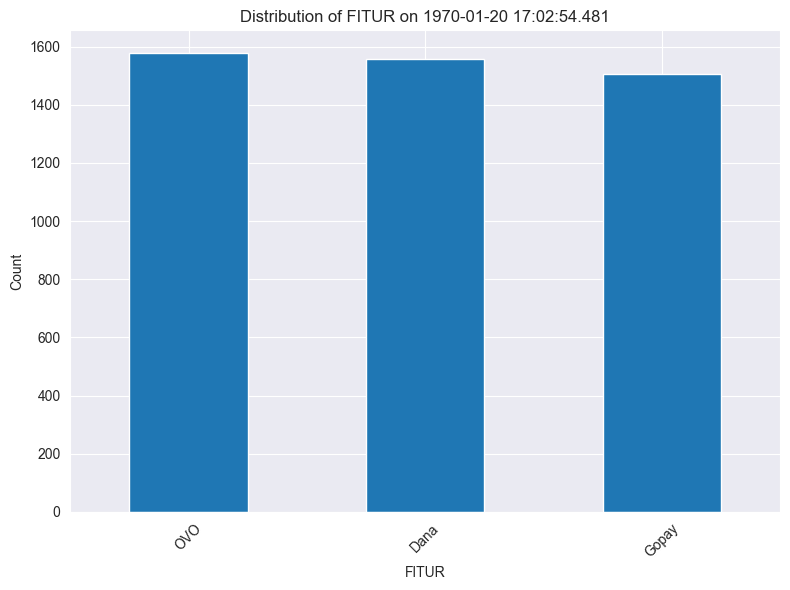

In [144]:
# Misalkan 'data' adalah DataFrame yang berisi kolom 'trx_date' dan 'FITUR'
# Filter data berdasarkan tanggal dan waktu tertentu (misal: '1970-01-20 17:02:54.481')
specific_date = '1970-01-20 17:02:54.481'
data_filtered = data[data['trx_date'] == specific_date]

# Plot bar chart untuk distribusi FITUR pada tanggal dan waktu tertentu
plt.figure(figsize=(8, 6))
data_filtered['fitur'].value_counts().plot(kind='bar')
plt.xlabel('FITUR')
plt.ylabel('Count')
plt.title(f'Distribution of FITUR on {specific_date}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


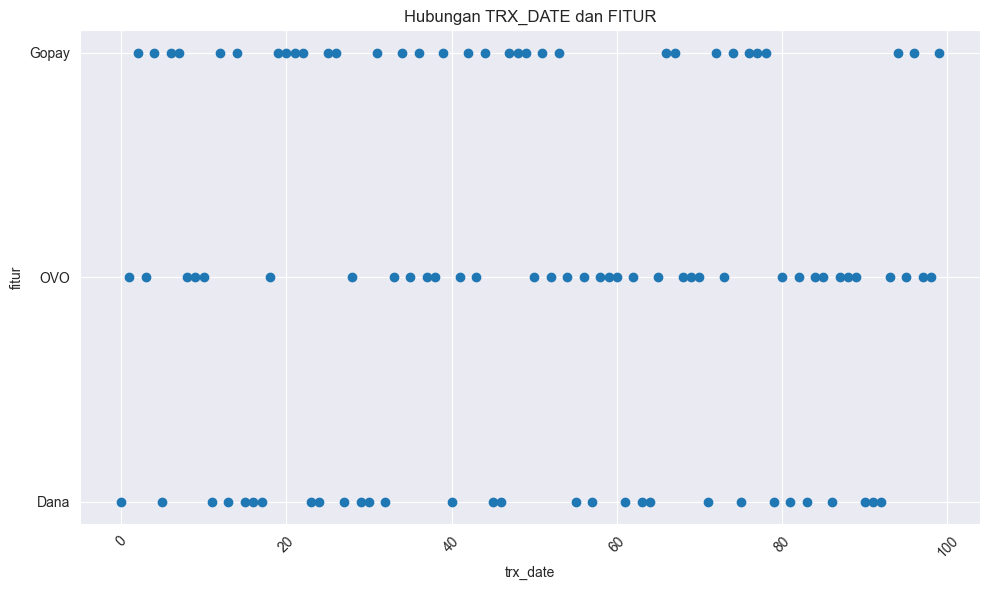

In [133]:

# Misalkan 'data' adalah DataFrame yang berisi data transaksi dengan TRX_DATE sebagai index
# Ambil contoh 100 data pertama untuk visualisasi
data_sample = data.head(100)

plt.figure(figsize=(10, 6))
plt.scatter(data_sample.index, data_sample['fitur'])  # Scatter plot jika FITUR adalah data kategorikal
plt.xlabel('trx_date')
plt.ylabel('fitur')
plt.title('Hubungan TRX_DATE dan FITUR')
plt.xticks(rotation=45)  # Rotasi label TRX_DATE agar terbaca dengan baik
plt.tight_layout()
plt.show()

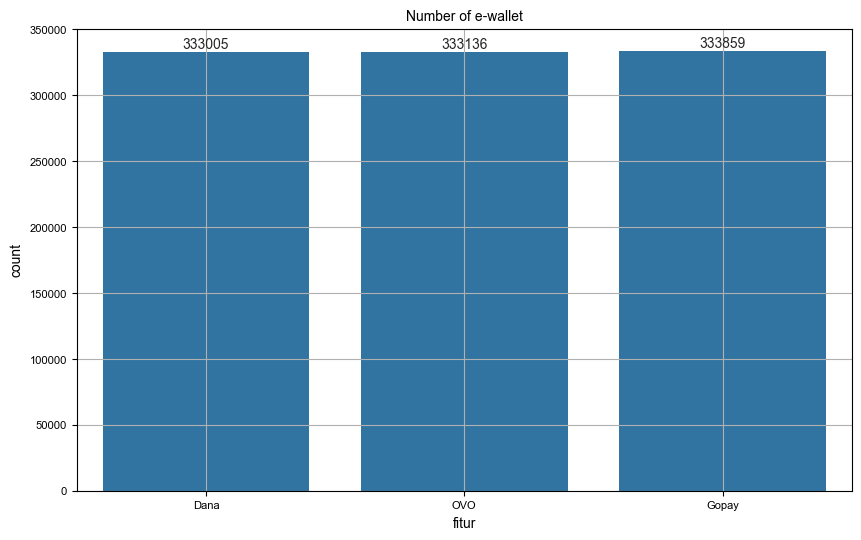

In [11]:
# Number of records related to year of the car bought
plt.figure(figsize = (10, 6))
ax=sns.countplot(data=data, x=data['fitur'])
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.title('Number of e-wallet', size=10)
plt.yticks(size=8)
plt.xticks(size=8)
plt.grid(linestyle='-')


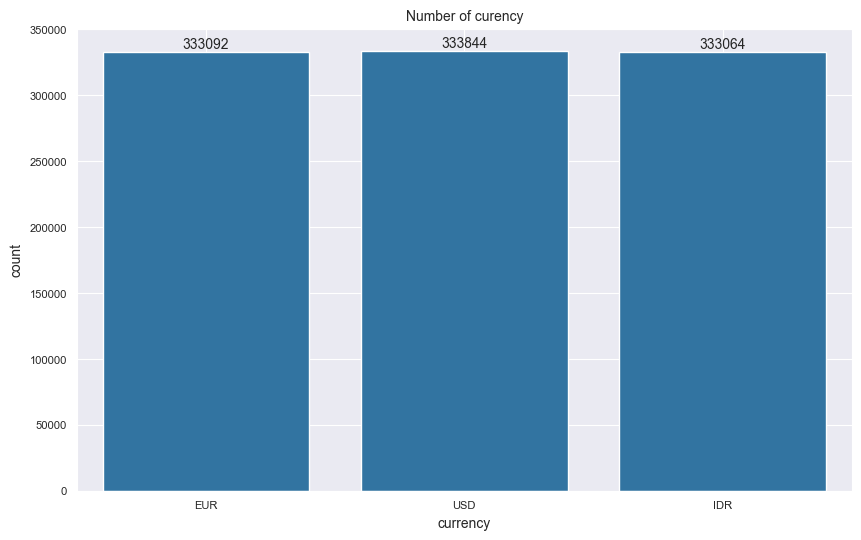

In [73]:
# Number of records related to year of the car bought
plt.figure(figsize = (10, 6))
ax=sns.countplot(data=data, x=data['currency'])
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.title('Number of curency', size=10)
plt.yticks(size=8)
plt.xticks(size=8)
plt.grid(linestyle='-')


# Feature Engineering

In [116]:
data.isnull().sum()

account_number      0
trx_type            0
amount              0
flag_db_cr          0
information         0
reference_number    0
currency            0
trx_time            0
cif                 0
fitur               0
CATEGORY            0
trx_date            0
dtype: int64

In [117]:
data.duplicated().sum()

0

In [14]:
# Langkah 1: Pemetaan Transaksi ke Kategori
def map_to_category(row):
    if row['trx_type'] == 'Ewallet' and row['fitur'] == 'Gopay':
        return 'SHOPPING'
    # Tambahkan kondisi lainnya sesuai kriteria Anda
    return 'OTHER'  

data['CATEGORY'] = data.apply(map_to_category, axis=1)

# Langkah 2: Hitung Akumulasi Amount per Kategori dan Rentang Waktu
# data['trx_date'] = pd.to_datetime(data['trx_date'], unit='ms')  # Konversi ke tipe datetime jika belum

# Misalkan ingin menghitung per minggu
weekly_summary = data.groupby(['CATEGORY', pd.Grouper(key='trx_date', freq='W-MON')])['amount'].sum().reset_index()

# Jika ingin menghitung per bulan
monthly_summary = data.groupby(['CATEGORY', pd.Grouper(key='trx_date', freq='M')])['amount'].sum().reset_index()

# Jika ingin menghitung per tahun
yearly_summary = data.groupby(['CATEGORY', pd.Grouper(key='trx_date', freq='Y')])['amount'].sum().reset_index()

# Tampilkan hasilnya
print("Summary per minggu:")
print(weekly_summary)
print("\nSummary per bulan:")
print(monthly_summary)
print("\nSummary per tahun:")
print(yearly_summary)


Summary per minggu:
   CATEGORY   trx_date    amount
0     OTHER 1970-01-26 -35346625
1  SHOPPING 1970-01-26   1778815

Summary per bulan:
   CATEGORY   trx_date    amount
0     OTHER 1970-01-31 -35346625
1  SHOPPING 1970-01-31   1778815

Summary per tahun:
   CATEGORY   trx_date    amount
0     OTHER 1970-12-31 -35346625
1  SHOPPING 1970-12-31   1778815


In [15]:
data

,account_number,trx_type,amount,flag_db_cr,information,trx_date,reference_number,currency,trx_time,cif,fitur,CATEGORY
0,55446,Payment,97312,C,WITHDRAWAL TRANSFER (ATM),1970-01-20 17:02:54.481,482252,EUR,05:49:53,8039417467,Dana,OTHER
1,600387,Ewallet,-81175,D,BIAYA ADMIN,1970-01-20 17:02:54.481,752022,USD,14:12:15,1504409771,OVO,OTHER
2,115823,Payment,33686,D,GOPAY,1970-01-20 17:02:54.481,43417,EUR,01:02:54,9678566510,Gopay,OTHER
3,411840,Payment,13414,C,DEPOSIT TRANSFER (ATM),1970-01-20 17:02:54.481,574789,USD,05:12:53,7709561344,OVO,OTHER
4,85697,Ewallet,48665,D,WITHDRAWAL TRANSFER (ATM),1970-01-20 17:02:54.481,987493,IDR,18:12:22,550868176,Gopay,SHOPPING
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,118085,Transfer,-32117,C,DEPOSIT CROSS BORDER,1970-01-20 17:02:54.698,356025,USD,22:32:43,2152574033,Dana,OTHER
999996,188351,Transfer,79214,C,PAYMENT TELCO PASCABAYAR,1970-01-20 17:02:54.698,487155,IDR,05:43:10,5482232444,OVO,OTHER
999997,676071,Ewallet,-97273,C,BIAYA ADMIN,1970-01-20 17:02:54.698,49524,USD,05:13:39,2387453059,Gopay,SHOPPING
999998,864344,Transfer,98985,D,DEPOSIT CROSS BORDER,1970-01-20 17:02:54.698,56703,IDR,22:55:59,8320169730,Gopay,OTHER


In [76]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_dt = data[cat_cols]
cat_dt.head()

,trx_type,flag_db_cr,information,currency,trx_time,fitur
0,Payment,C,WITHDRAWAL TRANSFER (ATM),EUR,05:49:53,Dana
1,Ewallet,D,BIAYA ADMIN,USD,14:12:15,OVO
2,Payment,D,GOPAY,EUR,01:02:54,Gopay
3,Payment,C,DEPOSIT TRANSFER (ATM),USD,05:12:53,OVO
4,Ewallet,D,WITHDRAWAL TRANSFER (ATM),IDR,18:12:22,Gopay


In [77]:
num_cols = data.select_dtypes(include=['float', 'int']).columns.tolist()
num_dt = data[num_cols]
num_dt['fitur'] = data['fitur']
num_dt.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12056\3348044718.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_dt['fitur'] = data['fitur']


,account_number,amount,trx_date,reference_number,cif,fitur
0,55446,97312,1702974481,482252,8039417467,Dana
1,600387,-81175,1702974481,752022,1504409771,OVO
2,115823,33686,1702974481,43417,9678566510,Gopay
3,411840,13414,1702974481,574789,7709561344,OVO
4,85697,48665,1702974481,987493,550868176,Gopay


#### **Kendalltau**

In [78]:
def cat_corr(col):
    corr_kendall, p_value = kendalltau(cat_dt[col], cat_dt['fitur'])
    print('Nama kolom:', col)
    print('Kendall Tau:', corr_kendall)
    print('P-Value:', p_value)

for column in cat_dt.columns:
    cat_corr(column)

Nama kolom: trx_type
Kendall Tau: -7.73759554131915e-05
P-Value: 0.930633446768711
Nama kolom: flag_db_cr
Kendall Tau: 0.0009113283376442924
P-Value: 0.333739478108913
Nama kolom: information
Kendall Tau: -0.00018684219240147027
P-Value: 0.8178900756971773
Nama kolom: currency
Kendall Tau: -0.0008348935980978641
P-Value: 0.3476000059968667
Nama kolom: trx_time
Kendall Tau: 0.00041870437663486863
P-Value: 0.5865039773656089
Nama kolom: fitur
Kendall Tau: 0.9999999999999998
P-Value: 0.0


In [79]:
def cat_corr(col):
    corr_kendall, p_value = kendalltau(num_dt[col], num_dt['fitur'])
    print('Nama kolom:', col)
    print('Kendall Tau:', corr_kendall)
    print('P-Value:', p_value)

for column in num_dt.columns:
    cat_corr(column)

Nama kolom: account_number
Kendall Tau: -0.0002638320194394557
P-Value: 0.7318036348625355
Nama kolom: amount
Kendall Tau: 0.0007139025475980943
P-Value: 0.35372759122908826
Nama kolom: trx_date
Kendall Tau: -0.0003600288563115124
P-Value: 0.6408379383362841
Nama kolom: reference_number
Kendall Tau: 0.00047542348660364615
P-Value: 0.5368441798852399
Nama kolom: cif
Kendall Tau: 0.0002350375731375496
P-Value: 0.7601206056680803
Nama kolom: fitur
Kendall Tau: 0.9999999999999998
P-Value: 0.0


#### **Feature Selection**

In [80]:
num_cols = ['account_number', 'cif', 'fitur']
num_df = data[num_cols]
num_df


,account_number,cif,fitur
0,55446,8039417467,Dana
1,600387,1504409771,OVO
2,115823,9678566510,Gopay
3,411840,7709561344,OVO
4,85697,550868176,Gopay
...,...,...,...
999995,118085,2152574033,Dana
999996,188351,5482232444,OVO
999997,676071,2387453059,Gopay
999998,864344,8320169730,Gopay


#### Cardinality Analysis

In [81]:
cardinality_df = pd.DataFrame({'Column': num_cols, 'Cardinality': [data[col].nunique() for col in num_cols]})

print(cardinality_df)

           Column  Cardinality
0  account_number       631727
1             cif       999947
2           fitur            3


#### Split X and Y

In [82]:
x = num_df.drop(['fitur'], axis = 1)
y = num_df['fitur']
x

,account_number,cif
0,55446,8039417467
1,600387,1504409771
2,115823,9678566510
3,411840,7709561344
4,85697,550868176
...,...,...
999995,118085,2152574033
999996,188351,5482232444
999997,676071,2387453059
999998,864344,8320169730


In [83]:

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Ubah label kelas menjadi format numerik
y_encoded = label_encoder.fit_transform(y)
# Mencetak nilai unik yang telah diubah

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.3, random_state = 15)

print('Train size', X_train.shape)
print('Test size', X_test.shape)
print('Train size', y_train.shape)
print('Test size', y_test.shape)

X_train

Train size (700000, 2)
Test size (300000, 2)
Train size (700000,)
Test size (300000,)


,account_number,cif
355857,124440,9584893162
203499,241747,3154695817
131845,969615,270332935
48026,474778,3939341345
474627,938703,514830588
...,...,...
704375,211326,7566388242
199301,315176,3708298395
794508,552403,3094218868
446197,331201,1143012955


#### Pipeline

In [85]:

# List kolom numerik
numeric_cols = ['account_number', 'cif']

# Transformer untuk kolom numerik
numeric_transformer = RobustScaler()

# Gabungkan transformer untuk kolom numerik saja
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ]
)

# Definisikan model yang akan digunakan
model = RandomForestClassifier()

# Gabungkan preprocessor dan model ke dalam Pipeline
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', model)
])

# Tampilkan pipeline yang telah dibuat
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['account_number', 'cif'])])),
                ('model', RandomForestClassifier())])

In [86]:
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier(n_jobs=-1))
# svm_pipeline = make_pipeline(preprocessor, SVC())
decision_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42))
random_forest_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42))
xgboost_pipeline = make_pipeline(preprocessor, XGBClassifier(objective='multi:softmax', num_class=7, random_state=42))

In [87]:
warnings.filterwarnings("ignore", category=FutureWarning)

classifiers = [
    ("K-Nearest Neighbors", knn_pipeline),
    # ("Support Vector Classifier", svm_pipeline),
    ("Decision Tree", decision_pipeline),
    ("Random Forest", random_forest_pipeline),
    ("XGBoost", xgboost_pipeline)
]

for name, pipeline in classifiers:
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}:")
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print("="*50)


K-Nearest Neighbors:
Cross-Validation Scores: [0.33301429 0.33212143 0.33158571 0.33485    0.33367857]
Mean Accuracy: 0.33304999999999996
Decision Tree:
Cross-Validation Scores: [0.33522857 0.33383571 0.33318571 0.33348571 0.33125   ]
Mean Accuracy: 0.33339714285714284
Random Forest:
Cross-Validation Scores: [0.3311     0.33261429 0.33228571 0.33433571 0.33013571]
Mean Accuracy: 0.3320942857142858
XGBoost:
Cross-Validation Scores: [0.33308571 0.33429286 0.33450714 0.33061429 0.33329286]
Mean Accuracy: 0.33315857142857147


# Model Training

In [88]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['account_number', 'cif'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_jobs=-1))])

In [89]:
decision_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['account_number', 'cif'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [90]:
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['account_number', 'cif'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [91]:
xgboost_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['account_number', 'cif'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature...e, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=7,
                               num_parallel_tree=None, ...))])

# Model Evaluation

In [92]:
y_train_predict_knn = knn_pipeline.predict(X_train)
y_test_predict_knn = knn_pipeline.predict(X_test)

y_train_predict_decision = decision_pipeline.predict(X_train)
y_test_predict_decision = decision_pipeline.predict(X_test)

y_train_predict_rf = random_forest_pipeline.predict(X_train)
y_test_predict_rf = random_forest_pipeline.predict(X_test)

y_train_predict_boost = xgboost_pipeline.predict(X_train)
y_test_predict_boost = xgboost_pipeline.predict(X_test)

In [93]:

classifiers = [
    ("K-Nearest Neighbors", knn_pipeline, X_train, X_test),
    ("Decision Tree", decision_pipeline, X_train, X_test),
    ("Random Forest", random_forest_pipeline, X_train, X_test),
    ("XGBoost", xgboost_pipeline, X_train, X_test)
]

for name, pipeline, X_train, X_test in classifiers:
    y_train_predict = pipeline.predict(X_train)
    y_test_predict = pipeline.predict(X_test)
    
    train_report = classification_report(y_train, y_train_predict)
    test_report = classification_report(y_test, y_test_predict)

    print(f"Classifier: {name}")
    print("Train Classification Report:")
    print(train_report)
    print("Test Classification Report:")
    print(test_report)
    print("="*50)
    print()

Classifier: K-Nearest Neighbors
Train Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.70      0.59    233118
           1       0.56      0.56      0.56    233821
           2       0.65      0.40      0.50    233061

    accuracy                           0.55    700000
   macro avg       0.57      0.55      0.55    700000
weighted avg       0.57      0.55      0.55    700000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.46      0.38     99887
           1       0.33      0.33      0.33    100038
           2       0.33      0.21      0.26    100075

    accuracy                           0.33    300000
   macro avg       0.33      0.33      0.32    300000
weighted avg       0.33      0.33      0.32    300000


Classifier: Decision Tree
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00     

# Model Saving and Load

In [94]:
# Menyimpan objek menggunakan modul 'pickle'
with open('model_knn.pkl', 'wb') as file_2:
    pickle.dump(knn_pipeline, file_2)

In [3]:
# Load the RandomForest model from 'model_rf.pkl'
with open('model_knn.pkl', 'rb') as file_2:
    loaded_model_rf = pickle.load(file_2)

In [7]:
# Membuat Data Baru

data_inf = {
    "account_number": [482252],
    "cif": [8039417467],
}

# Membuat DataFrame dari data baru
data_inf = pd.DataFrame(data_inf)

# Menampilkan data baru
data_inf

,account_number,cif
0,482252,8039417467


In [8]:
y_pred_inf = loaded_model_rf.predict(data_inf)

c:\Users\ASUS\anaconda3\envs\jalan1\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\ASUS\anaconda3\envs\jalan1\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\ASUS\anaconda3\envs\jalan1\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [9]:
y_pred_inf

array([0])

dana : 0
gopay :1
ovo : 2